# 1083 Albumin Initial ML

### By: Ian Weimer

## Imports

In [91]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import cross_val_score
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
import warnings
from sklearn.compose import make_column_transformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import balanced_accuracy_score
pd.set_option('display.max_columns', None)

## Load Albumin Data From Pre-processing and Exploratory Analysis

In [92]:
df = pd.read_csv('albumin_cleaned_4.csv')

In [93]:
# drop insignificant vars

#df.drop(columns = ['bed_size', 'Cirrhosis', 'tenant'], inplace=True)

In [94]:
df.head()

sex  ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1    1                 0                   1            2.0    6   
1    1    0                 0                   0            0.0    3   
2    1    0                 0                   0            3.0    2   
3    1    0                 0                   2            1.0    2   
4    0    0                 0                   0            0.0    2   

   albumin_24hrs  MELD  qSOFA  beta_blocker  hemorrhagic    LOS_hours  \
0            0.0  11.0      1             1            0  1016.016667   
1            0.0  13.0      2             1            0   698.150000   
2            0.0   9.0      0             0            0   135.266667   
3            1.0   9.0      0             0            0    58.183333   
4            1.0  10.0      0             1            0   333.866667   

   30_day_mortality  30_day_readmission  
0                 0                   0  
1                 0                   0  
2                 0                   0  
3                 0                   0  
4                 0                   0

In [95]:
df.shape

(46629, 14)

In [96]:
df = df.drop(columns=['30_day_readmission', '30_day_mortality'])

In [97]:
df['albumin_value'].describe()

KeyError: 'albumin_value'

In [98]:
df.describe()

sex           ICU  mass_transfusion  total_transfusions  \
count  46629.000000  46629.000000      46629.000000        46629.000000   
mean       0.545455      0.195458          0.023419            0.655708   
std        0.497935      0.396557          0.151231            1.095456   
min        0.000000      0.000000          0.000000            0.000000   
25%        0.000000      0.000000          0.000000            0.000000   
50%        1.000000      0.000000          0.000000            0.000000   
75%        1.000000      0.000000          0.000000            1.000000   
max        1.000000      1.000000          1.000000            6.000000   

       anemia_status           CCI  albumin_24hrs          MELD         qSOFA  \
count   46629.000000  46629.000000   46629.000000  46629.000000  46629.000000   
mean        1.742199      3.359412       0.042506     11.752025      0.416329   
std         1.083163      2.633050       0.201742      6.436456      0.642641   
min         0.000000      0.000000       0.000000      6.000000      0.000000   
25%         1.000000      1.000000       0.000000      7.000000      0.000000   
50%         2.000000      3.000000       0.000000      9.000000      0.000000   
75%         3.000000      5.000000       0.000000     14.000000      1.000000   
max         3.000000     19.000000       1.000000     40.000000      3.000000   

       beta_blocker   hemorrhagic     LOS_hours  
count  46629.000000  46629.000000  46629.000000  
mean       0.311373      0.054816    158.817633  
std        0.463060      0.227623    162.472085  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000     66.850000  
50%        0.000000      0.000000    100.700000  
75%        1.000000      0.000000    181.116667  
max        1.000000      1.000000   1155.033333

## Convert LOS to Categorical

In [99]:
df['LOS_hours'].describe()

count    46629.000000
mean       158.817633
std        162.472085
min          0.000000
25%         66.850000
50%        100.700000
75%        181.116667
max       1155.033333
Name: LOS_hours, dtype: float64

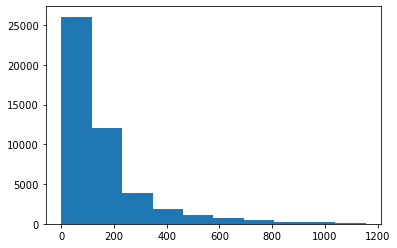

In [100]:
plt.hist(df['LOS_hours']);

In [101]:
LOS = df['LOS_hours']
m = max(LOS)

bins = [0, 100, 200, m]
labels=[0, 1, 2]

# 0 - Low/Short Length of Stay
# 1 - Medium Length of Stay
# 2 - High/Long Length of Stay

LOS = pd.cut(LOS, bins=bins, labels=labels, include_lowest=True)

In [102]:
df['LOS_hours'] = LOS

In [103]:
df['LOS_hours'].head()

0    2
1    2
2    1
3    0
4    2
Name: LOS_hours, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [104]:
df['LOS_hours'].value_counts()

0    23081
1    13411
2    10137
Name: LOS_hours, dtype: int64

In [105]:
df.head()

sex  ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1    1                 0                   1            2.0    6   
1    1    0                 0                   0            0.0    3   
2    1    0                 0                   0            3.0    2   
3    1    0                 0                   2            1.0    2   
4    0    0                 0                   0            0.0    2   

   albumin_24hrs  MELD  qSOFA  beta_blocker  hemorrhagic LOS_hours  
0            0.0  11.0      1             1            0         2  
1            0.0  13.0      2             1            0         2  
2            0.0   9.0      0             0            0         1  
3            1.0   9.0      0             0            0         0  
4            1.0  10.0      0             1            0         2

In [106]:
df.columns

Index(['sex', 'ICU', 'mass_transfusion', 'total_transfusions', 'anemia_status',
       'CCI', 'albumin_24hrs', 'MELD', 'qSOFA', 'beta_blocker', 'hemorrhagic',
       'LOS_hours'],
      dtype='object')

In [107]:
df.drop(columns=['sex', 'ICU', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'hemorrhagic', 'CCI', 'beta_blocker'], inplace=True)

## Modeling

In [108]:
# establish target feature, LOS_hours, as y feature
y = df['LOS_hours']
# drop target feature from features dataframe
X = df.drop(columns = ['LOS_hours'], axis = 1)
# save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [109]:
cols

Index(['albumin_24hrs', 'MELD', 'qSOFA'], dtype='object')

## Standardize Data

In [110]:
#cols = X.columns

#instantiate min-max scaling object
mm = MinMaxScaler()
# fit and transform feature dataframe
X = pd.DataFrame(mm.fit_transform(X))
# reassign column names so new dataframe has corresponding names
X.columns = cols

In [111]:
X.head()

albumin_24hrs      MELD     qSOFA
0            0.0  0.147059  0.333333
1            0.0  0.205882  0.666667
2            0.0  0.088235  0.000000
3            1.0  0.088235  0.000000
4            1.0  0.117647  0.000000

## Train Test Split

In [112]:
# train test split from target feature series and the predicting feature dataframe (set test size to 20% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 33)

## Multinomial Logistic Regression

In [113]:
# instantiate a Logistic Regression model without an intercept, 'liblinear' solver method
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model to X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

Feature: albumin_24hrs Score: -0.43307
Feature: MELD Score: -1.19317
Feature: qSOFA Score: -0.94810


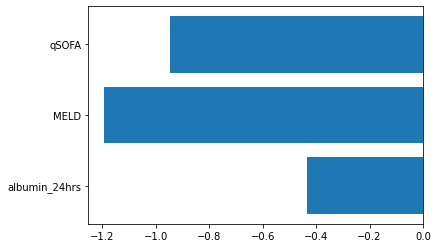

In [114]:
# general quick feature importance
# get coefficients for importance
# coefficients represent the log odds that an observation is in the
# target class, given the values of its X variables

importance = logreg.coef_[0]
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

               Importance
albumin_24hrs    0.648514
qSOFA            0.387475
MELD             0.303258


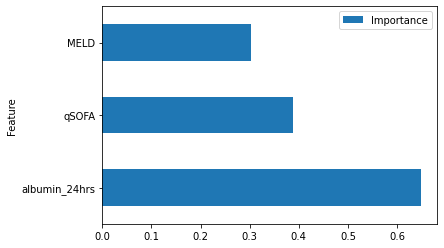

In [115]:
# convert log odds into regular odds with exponentiation
# np.exp()
# and list values, visualize in bar plot

odds = np.exp(logreg.coef_[0])
feature_importance = \
            pd.DataFrame(odds, 
             X.columns, 
             columns=['Importance'])\
            .sort_values(by='Importance', ascending=False)
        
ax = feature_importance.plot.barh(xlabel='Feature', ylabel='Importance')
print(feature_importance)
plt.show()

In [116]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [117]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[17103   382   932]
 [ 9243   384  1144]
 [ 6208   394  1513]]


In [118]:
# model metrics for training set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.53      0.93      0.67     18417
           1       0.33      0.04      0.06     10771
           2       0.42      0.19      0.26      8115

    accuracy                           0.51     37303
   macro avg       0.43      0.38      0.33     37303
weighted avg       0.45      0.51      0.41     37303



In [119]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[4329   95  240]
 [2260   98  282]
 [1516  109  397]]


In [120]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.53      0.93      0.68      4664
           1       0.32      0.04      0.07      2640
           2       0.43      0.20      0.27      2022

    accuracy                           0.52      9326
   macro avg       0.43      0.39      0.34      9326
weighted avg       0.45      0.52      0.42      9326



## Decision Tree

In [129]:
# instantiate a decision tree model
dt = tree.DecisionTreeClassifier(max_depth=4)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

Feature: albumin_24hrs Score: 0.08162
Feature: MELD Score: 0.54176
Feature: qSOFA Score: 0.37662


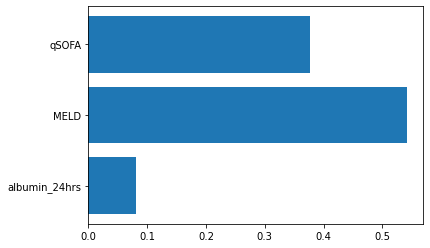

In [130]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [131]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [132]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[17122    66  1229]
 [ 9255    78  1438]
 [ 6197    69  1849]]


In [133]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.53      0.93      0.67     18417
           1       0.37      0.01      0.01     10771
           2       0.41      0.23      0.29      8115

    accuracy                           0.51     37303
   macro avg       0.43      0.39      0.33     37303
weighted avg       0.45      0.51      0.40     37303



In [134]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[4327   14  323]
 [2274   29  337]
 [1522   19  481]]


In [135]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.53      0.93      0.68      4664
           1       0.47      0.01      0.02      2640
           2       0.42      0.24      0.30      2022

    accuracy                           0.52      9326
   macro avg       0.47      0.39      0.33      9326
weighted avg       0.49      0.52      0.41      9326



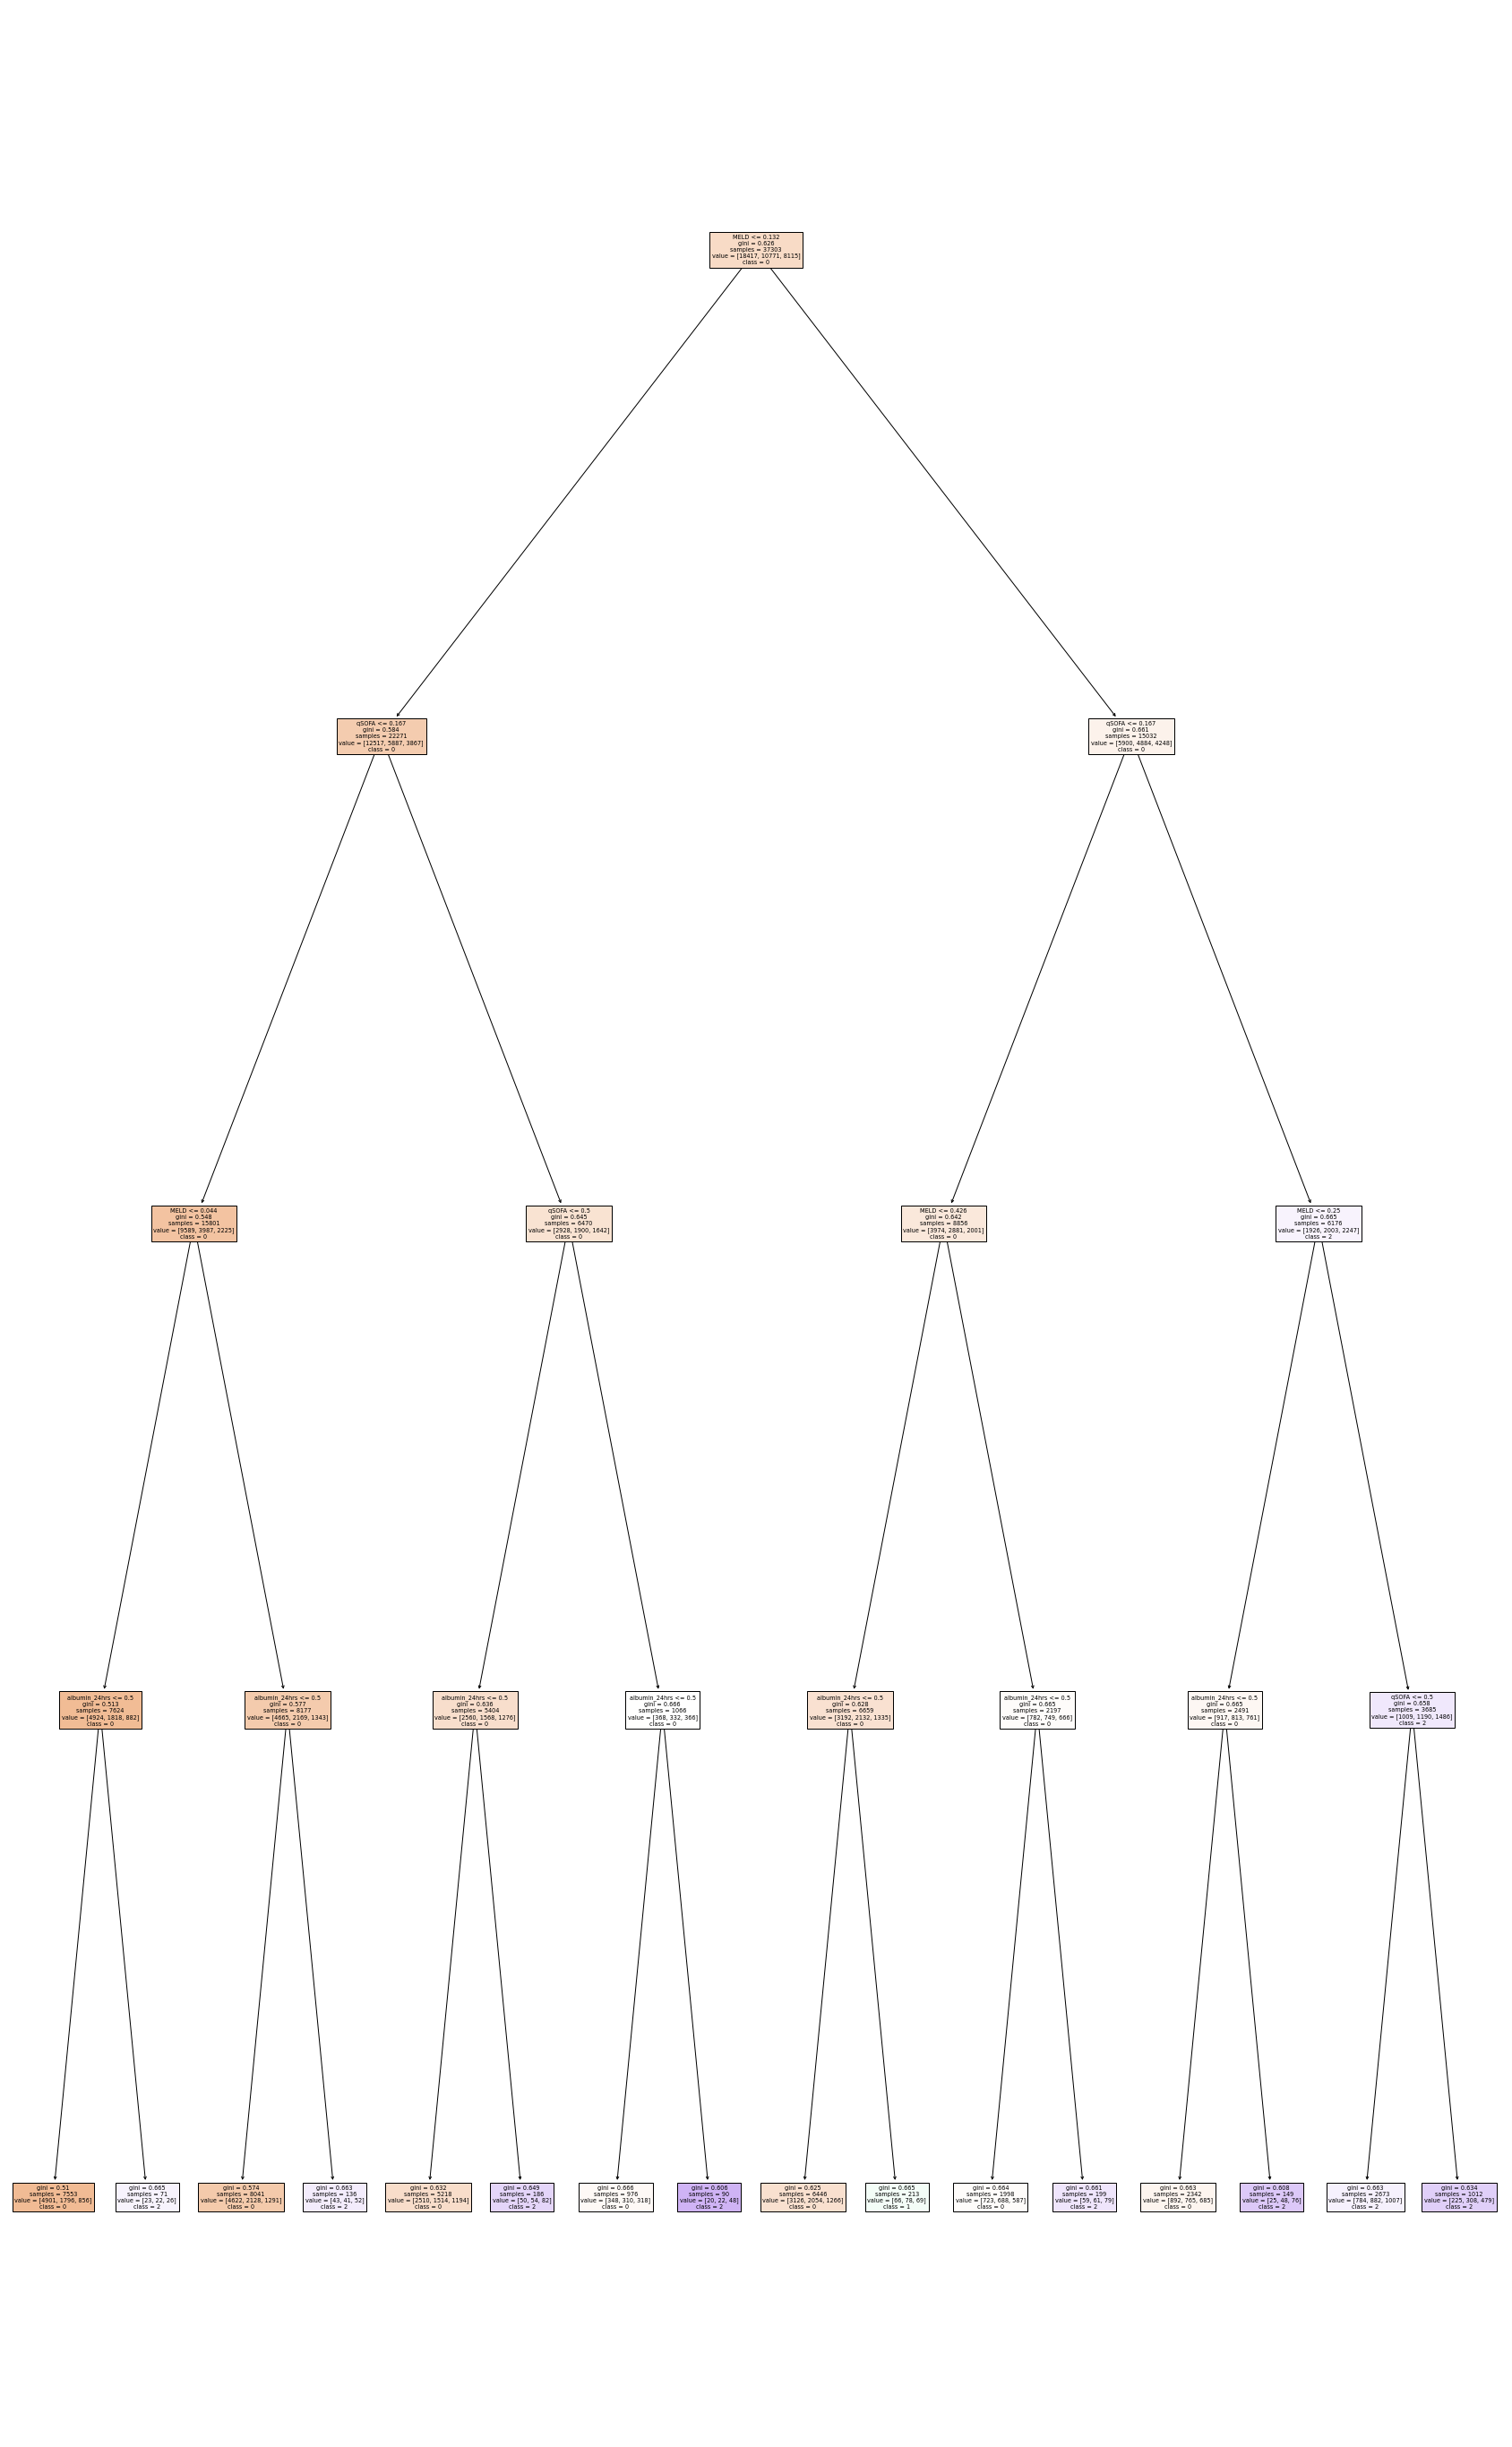

In [136]:
feature_names = df.columns.tolist()
class_names = ['0', '1', '2']

fig = plt.figure(figsize=(30,50))
_ = tree.plot_tree(dt, 
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)